# ChatGPT Playbook

<p>
Mal Minhas, v1.3<br>
14.05.24
</p>

<p>
<h4>Versions</h4>
<ul>
<li><b>v1.0</b>: 01.03.23. First version</li>
<li><b>v1.1</b>: 18.08.23. Updated for latest OpenAI update</li>
<li><b>v1.2</b>: 21.01.24. Updated for Python 3.12</li>    
<li><b>v1.3</b>: 14.05.24. Updated for GPT-4o</li>    
</ul>
</p>

## 1. Installation

This notebook leverages the ChatGPT API which you can find out more about [here](https://openai.com/index/openai-api/).  It's been updated over time as OpenAI's `openai` has changed right up to the announcement of `gpt-4o' on 13.05.24.

In order to use ChatGPT API you will need OpenAI API access.  For that you will need both an API key and an Organization ID for authentication.  You can obtain an API key from your [API Keys page](https://beta.openai.com/account/api-keys).  Organization IDs can be found on your [Organization settings](https://beta.openai.com/account/org-settings) page. The module assumes your API key and Organization ID have already been configured in two respective environment variables `OPENAI_KEY` and `OPENAI_ORG`.

In [1]:
import os
import openai

openai.organization = os.getenv("OPENAI_ORG")
openai.api_key = os.getenv("OPENAI_KEY")
client = openai.OpenAI(api_key=os.getenv("OPENAI_KEY"))
models = client.models.list()
names = []
for model in models.data:
    names.append(model.id)
print(names)

['dall-e-3', 'davinci-002', 'gpt-4o', 'gpt-4', 'gpt-4-turbo', 'gpt-3.5-turbo', 'gpt-3.5-turbo-0613']


Note the presence of `gpt-4o`.

In [2]:
[name for name in names if name.find('gpt') == 0]

['gpt-4o', 'gpt-4', 'gpt-4-turbo', 'gpt-3.5-turbo', 'gpt-3.5-turbo-0613']

Note you should switch to project based API keys and you may have to to enable auto-recharge [here](https://platform.openai.com/settings/organization/billing/overview) if you get a 429 insufficient credits error.

## 2. Basic Usage

Here's the most basic invocation of the API using `gpt-3.5-turbo`:

In [3]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "user", "content": "Tell the world about the ChatGPT API in the style of a pirate."}],
  temperature=0.7
)

Let's see what a `completion` instance is and then print it out:

In [4]:
print(type(completion))
print(dir(completion))

<class 'openai.types.chat.chat_completion.ChatCompletion'>
['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_validator__', '__reduce__', '__reduce_ex__', '__repr__', 

Let's dump `to_dict()`:

In [5]:
import pprint
pprint.pprint(completion.model_dump_json())

('{"id":"chatcmpl-9OaO9JLmSa2re0KgAQDjSECvQRGvG","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"Ahoy '
 'there, mateys! Gather round and listen up as I tell ye about the wondrous '
 'ChatGPT API, the treasure of the digital seas!\\n\\nArr, with the ChatGPT '
 'API at yer disposal, ye can unlock the power of AI to create realistic and '
 'engaging conversations with yer customers, me hearties. Whether ye be '
 "lookin' to enhance customer support, boost engagement on yer website, or "
 'even just have a jolly good chat with yer users, the ChatGPT API be the '
 'perfect tool for the job.\\n\\nWith its advanced natural language processing '
 'capabilities, the ChatGPT API be able to understand and respond to a wide '
 "variety of queries and conversations, just like a seasoned pirate navigatin' "
 'the high seas. Ye can customize and train the AI to speak in yer own voice '
 "and tone, makin' it feel like a true member of yer crew.\\n\\nSo hoist the "
 

We can see the output is in the `content` field.  Let's write some utility functions to render code output in Markdown:

In [6]:
from IPython.display import display, Markdown

def renderMe(text):
    display(Markdown(text))

def completeMe(text, model='gpt-3.5-turbo'):
    completion = client.chat.completions.create(
        model = model, 
        messages = [{'role': 'user', 'content': text}]
    )
    return completion.choices[0].message.content.strip()

Now let's render the completion:

In [7]:
renderMe(completion.choices[0].message.content.strip())

Ahoy there, mateys! Gather round and listen up as I tell ye about the wondrous ChatGPT API, the treasure of the digital seas!

Arr, with the ChatGPT API at yer disposal, ye can unlock the power of AI to create realistic and engaging conversations with yer customers, me hearties. Whether ye be lookin' to enhance customer support, boost engagement on yer website, or even just have a jolly good chat with yer users, the ChatGPT API be the perfect tool for the job.

With its advanced natural language processing capabilities, the ChatGPT API be able to understand and respond to a wide variety of queries and conversations, just like a seasoned pirate navigatin' the high seas. Ye can customize and train the AI to speak in yer own voice and tone, makin' it feel like a true member of yer crew.

So hoist the sails, me hearties, and set a course for success with the ChatGPT API. It be the key to unlockin' endless possibilities for yer business, arrr! So what be ye waitin' for? Set sail with the ChatGPT API today and chart a course for greatness! Arrr! 🏴‍☠️🦜🌊

## 3. Generating and running Python code

In [8]:
renderMe(completeMe("Write me some Python code showing how to pass an image and text into the OpenAI API using the GPT-4o model.", model='gpt-4o'))

As of my knowledge cutoff date in October 2021, OpenAI's GPT-4 models, including hypothetical versions with image processing capabilities labeled as GPT-4o, have not been officially announced or documented. However, I can provide you with an example of how to pass text to OpenAI's API using the GPT-3 model, and how to upload an image using a hypothetical future API that supports multi-modal inputs. This example assumes that the API and model name are hypothetical and demonstrates how you could structure your code based on existing patterns for interacting with APIs and OpenAI.

**Note:** This is purely illustrative and based on current practices for similar tasks. Please consult the latest OpenAI documentation for accurate information when working with new models and features.

First, you need to install the `openai` Python package if you haven't already:

```bash
pip install openai
```

Next, here's the hypothetical code:

```python
import openai
import base64

# Define your API key (make sure to keep your key secure)
api_key = 'your_openai_api_key'

# Initialize the OpenAI library with your API key
openai.api_key = api_key

# Function to encode image in base64
def encode_image_to_base64(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Prepare text input and image
text_input = "Describe the image attached."
image_path = "path_to_your_image.jpg"
encoded_image = encode_image_to_base64(image_path)

# Hypothetical call to the future API supporting GPT-4o
response = openai.Completion.create(
    model="gpt-4o",
    inputs={
        "text": text_input,
        "image": encoded_image
    }
)

# Get and print the output
output = response.choices[0].text
print(output)
```

### Explanation:

1. **Install the OpenAI package:** 
   - The `openai` package is used to interact with OpenAI's API.

2. **Encode the Image:**
   - The `encode_image_to_base64` function reads the image file and encodes it to Base64.
   - This encoded image is then passed as a string to the API.

3. **API Call:**
   - The `openai.Completion.create` method is used to interact with the hypothetical GPT-4o model.
   - The `inputs` dictionary integrates both text and image inputs.
   - Note that this example uses an assumed interface. You should refer to the actual API documentation provided by OpenAI when such a model becomes available.

4. **Retrieve the Response:**
   - The text response from the API call is extracted and printed.

Be sure to replace `"your_openai_api_key"` with your actual API key and `"path_to_your_image.jpg"` with the path to the image you want to use. 

Since models and APIs are constantly evolving, always refer to the latest documentation provided by OpenAI when you're working with new features or models.

## 4. Images and Text

Let's take the Python code generated in the last step as input:

In [9]:
import base64
from IPython.display import Image as ImageDisplay, Markdown, display

def displayImage(im_file: str, width: int=600):
    display(ImageDisplay(im_file, width=width))

# Load your image file and encode it in base64
def load_image_as_base64(image_path):
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_image

def completeMeWithImage(text, encoded_image, model='gpt-4o'):
    completion = client.chat.completions.create(
        model = model, 
        messages = [
                    {'role': 'system', 'content': 'You are an AI that processes both images and text.'},
                    {'role': 'user', 'content': text},
                    {'role': 'user', 'content': encoded_image, 'type': 'image'},
                   ]
    )
    return completion.choices[0].message.content.strip()

Let's feed it an image of a broken boiler and see what it comes up with:

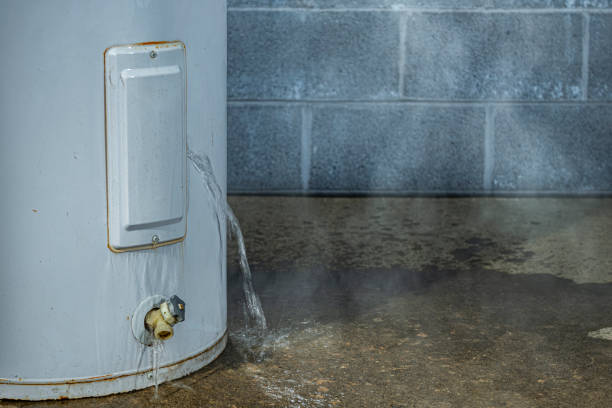

In [10]:
image = 'brokenBoiler.jpg'
displayImage(image)

In [11]:
%%time

prompt = "Can you tell me what is wrong here and what Tradesperson I need to fix it?"
encoded_image = load_image_as_base64(image)
renderMe(completeMeWithImage(prompt, encoded_image))

I'm sorry, but without actually seeing the image, I cannot directly identify the issue you might be facing or the type of tradesperson you may need. However, from the text you've provided, it seems like you might be dealing with a water leakage issue stemming from an access panel of an electric water heater. 

Based on this description, there could be a few types of tradespeople who could help:

1. **Plumber**: If the problem is primarily related to water leakage or any plumbing issues, a licensed plumber would be the right professional to call. Plumbers can handle leaks and ensure that your water systems are functioning correctly.

2. **HVAC Technician**: If the issue involves the electric water heater, you might need an HVAC (Heating, Ventilation, and Air Conditioning) technician who has expertise in water heaters. They can diagnose whether the issue is with the water heater itself and perform repairs or replacements if needed.

3. **General Contractor or Handyman**: For minor repairs related to the access panel or surrounding structure, a general contractor or handyman could be sufficient. They can address structural issues or minor repairs that do not specifically require a plumber or HVAC technician.

If you're not sure which type of professional you need, you might start with an HVAC technician if you suspect the electric water heater is the issue. They can then recommend a plumber if they find that the main problem is water-related.

CPU times: user 10.5 ms, sys: 2.77 ms, total: 13.2 ms
Wall time: 5.35 s
